In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the dataset
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
gender_submission_df = pd.read_csv('/content/gender_submission.csv')
print(f"Dataset shape: {train_df.shape}")
print(train_df.head())


print(f"Dataset shape: {test_df.shape}")
print(test_df.head())

print(f"Dataset shape: {gender_submission_df.shape}")
print(gender_submission_df.head())


Dataset shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

TITANIC DATASET - DATA CLEANING AND EXPLORATORY DATA ANALYSIS

1. INITIAL DATA EXPLORATION
----------------------------------------
Training set shape: (891, 12)
Test set shape: (418, 11)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

First 5 rows:
   PassengerId  Survi

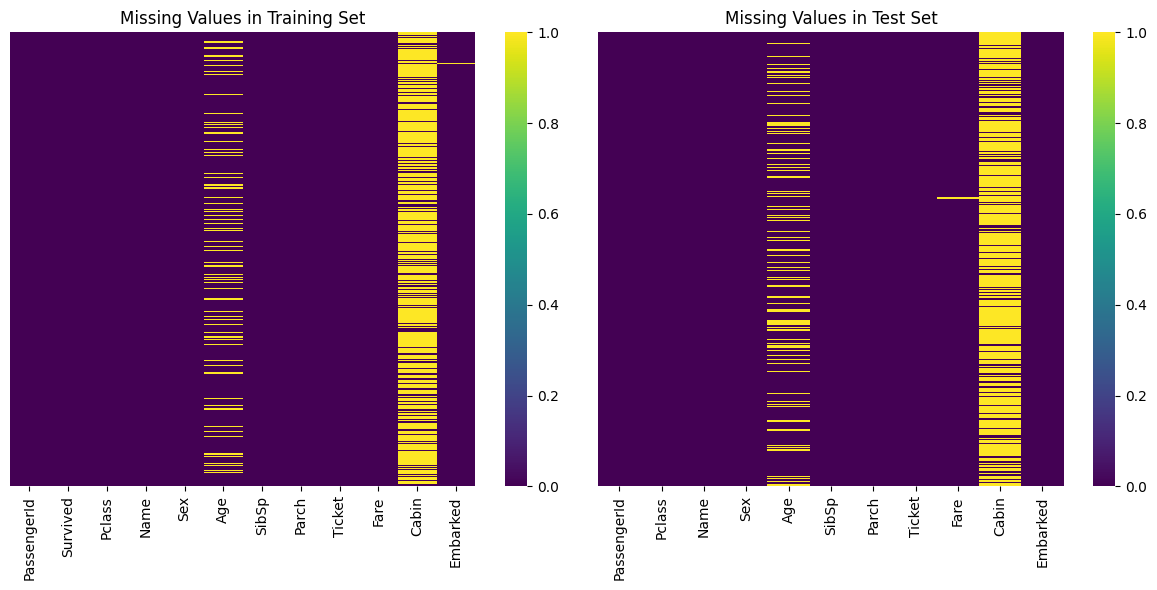


3. SURVIVAL ANALYSIS
----------------------------------------
Overall survival rate: 0.384 (38.4%)

Survival by Sex:
        count  sum   mean
Sex                      
female    314  233  0.742
male      577  109  0.189

Survival by Passenger Class:
        count  sum   mean
Pclass                   
1         216  136  0.630
2         184   87  0.473
3         491  119  0.242


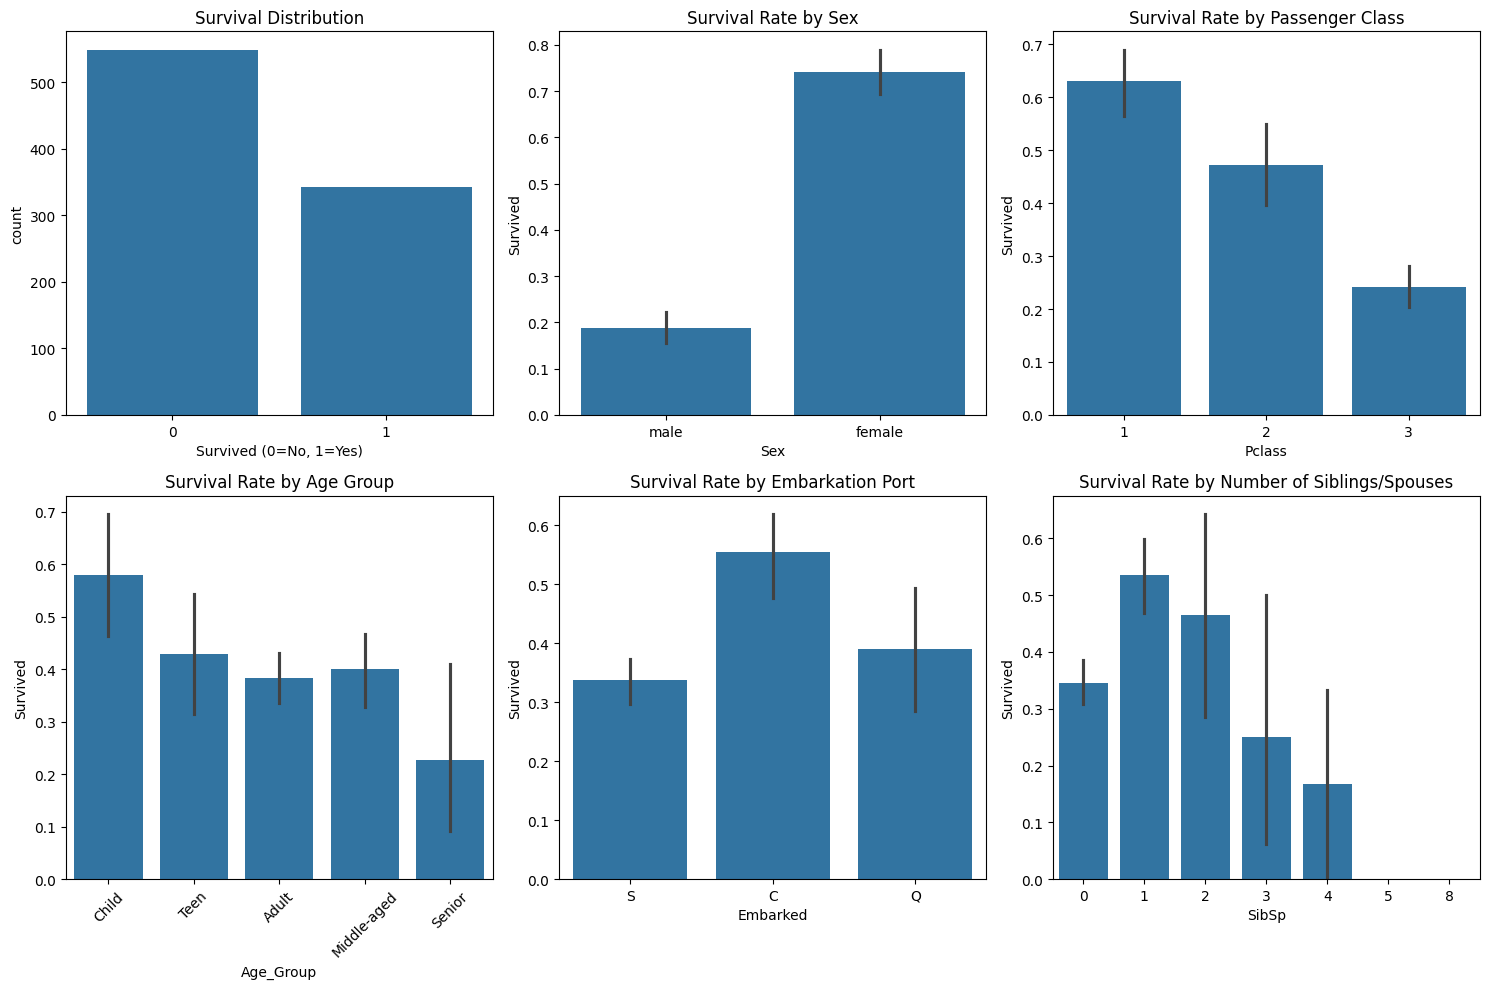


4. DETAILED FEATURE ANALYSIS
----------------------------------------


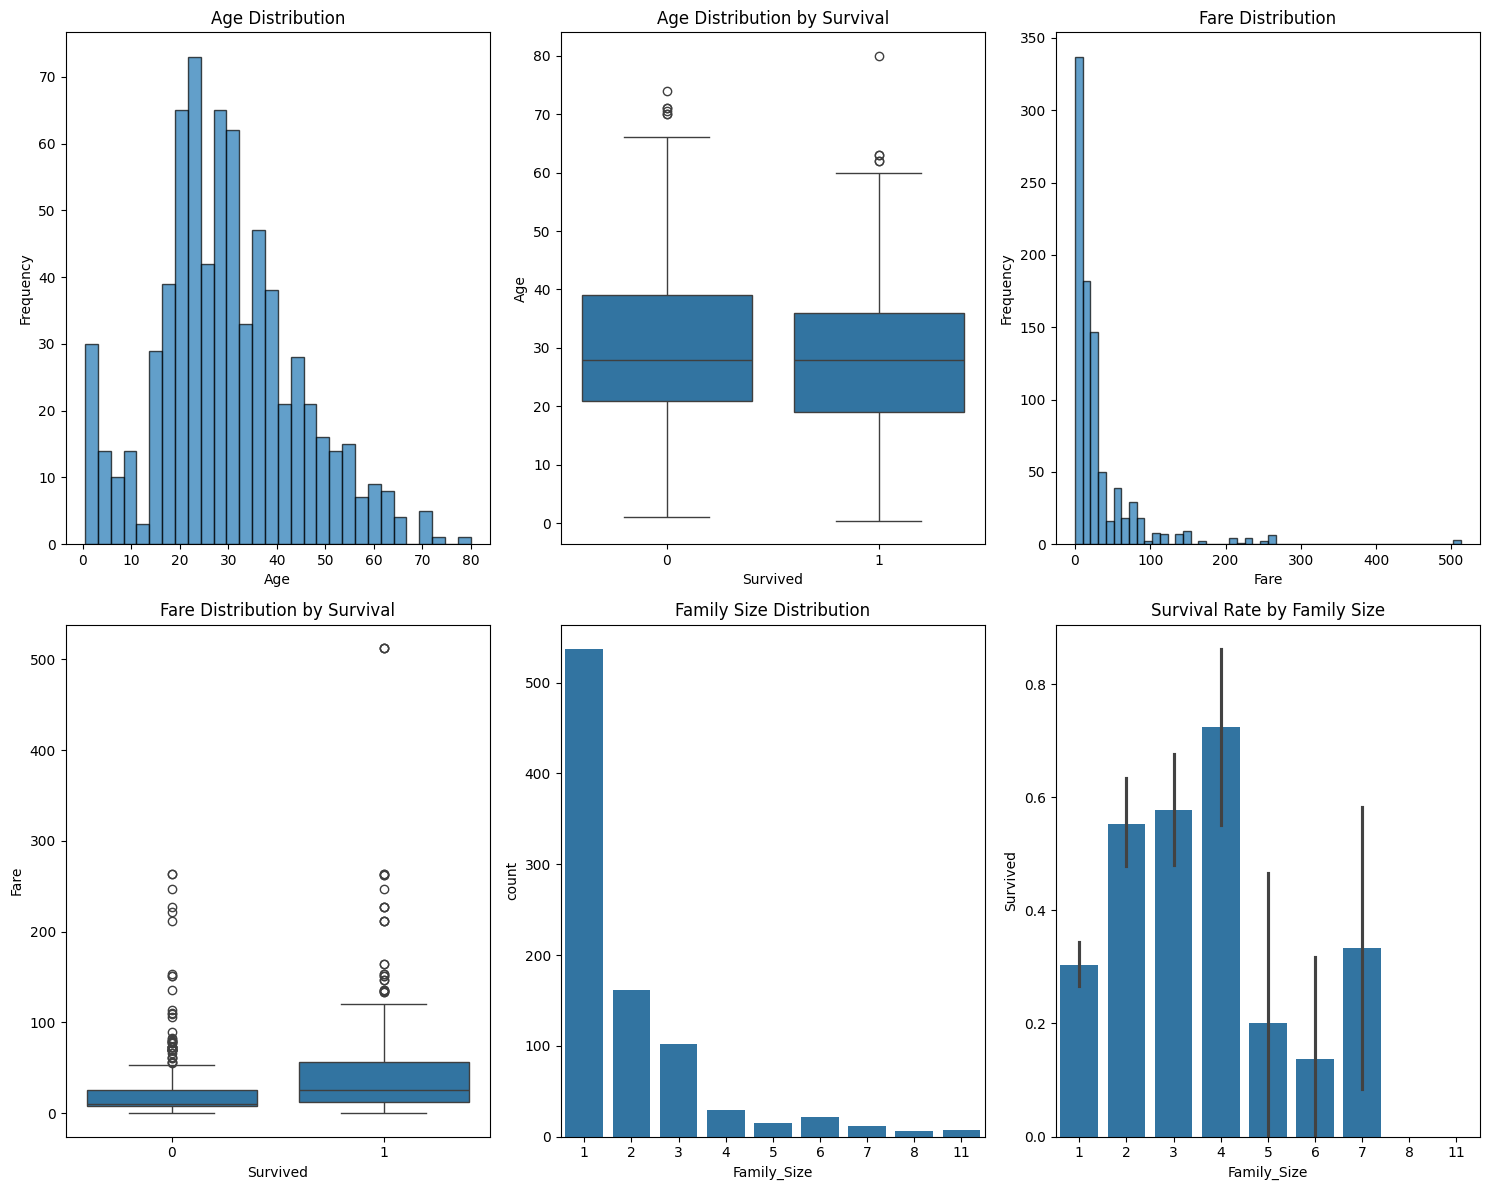


5. CORRELATION ANALYSIS
----------------------------------------


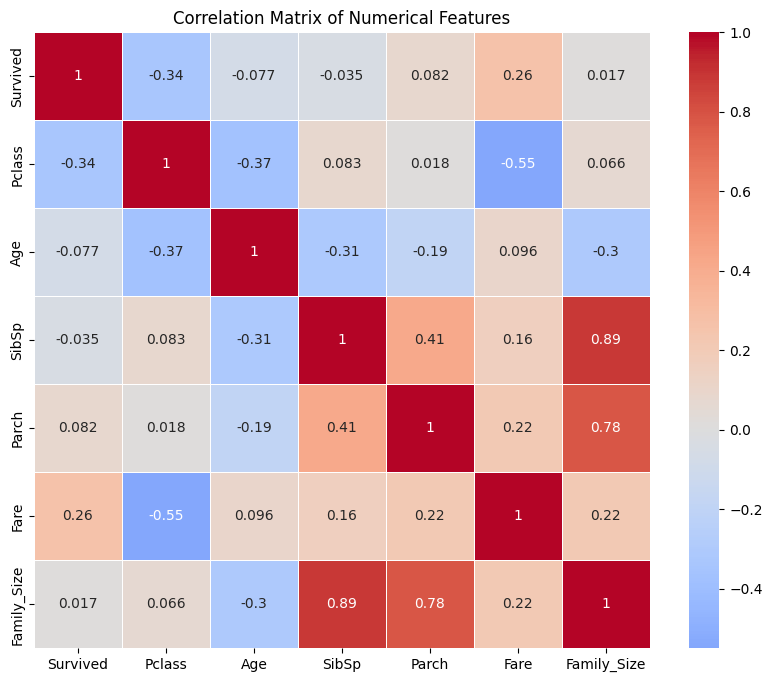

Correlation with Survival:
Survived       1.000000
Fare           0.257307
Parch          0.081629
Family_Size    0.016639
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

6. DATA CLEANING
----------------------------------------
Combined dataset shape: (1309, 14)

Handling missing values:
- Filling Age with median based on Pclass and Sex
- Filling Embarked with mode
- Filling Fare with median based on Pclass

Creating new features:
New features created:
- Family_Size: SibSp + Parch + 1
- Is_Alone: 1 if Family_Size == 1, else 0
- Title: Extracted from Name and grouped
- Age_Group: Categorized age into groups
- Fare_Group: Quartile-based fare groups

7. FEATURE RELATIONSHIPS
----------------------------------------


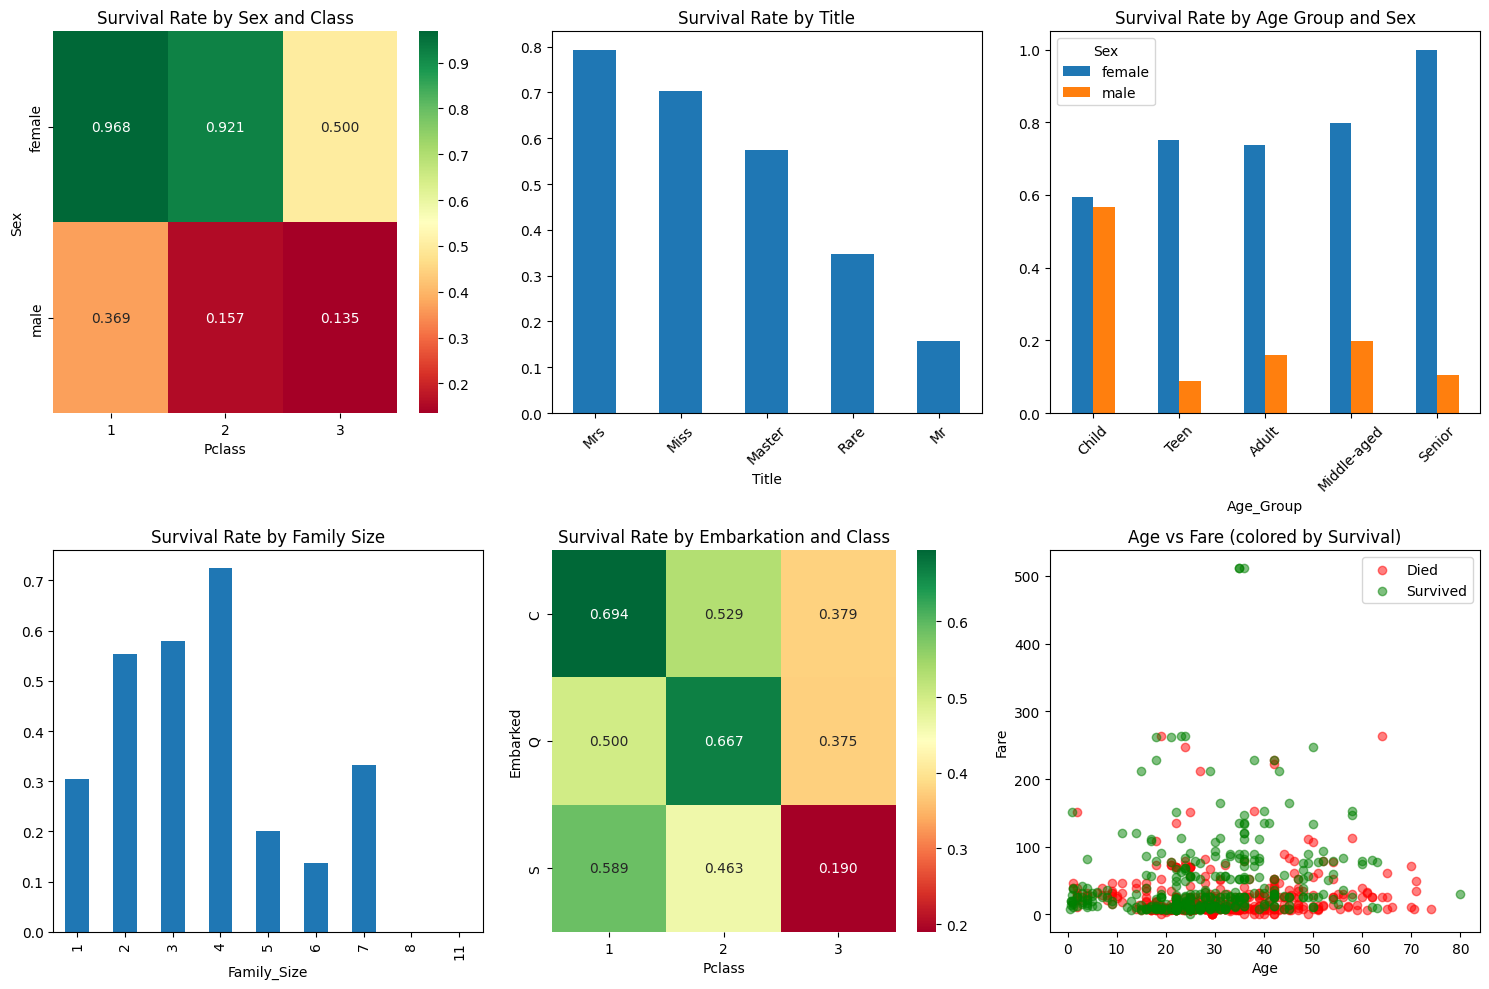


8. STATISTICAL SUMMARY
----------------------------------------
Key Insights from EDA:
1. Overall survival rate: 38.4%
2. Women had much higher survival rate than men
3. First class passengers had highest survival rate
4. Children had higher survival rates than adults
5. Passengers with small families (2-4 members) had better survival rates
6. Passengers from port C (Cherbourg) had highest survival rate
7. Higher fare generally correlated with better survival

Final combined dataset shape: (1309, 17)
Missing values after cleaning:
1432

DATA CLEANING AND EDA COMPLETED


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Load the dataset (assuming you've already loaded them)
# train_df = pd.read_csv('/content/train.csv')
# test_df = pd.read_csv('/content/test.csv')

print("="*60)
print("TITANIC DATASET - DATA CLEANING AND EXPLORATORY DATA ANALYSIS")
print("="*60)

# ============================================================================
# 1. INITIAL DATA EXPLORATION
# ============================================================================
print("\n1. INITIAL DATA EXPLORATION")
print("-" * 40)

print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

print("\nDataset Info:")
print(train_df.info())

print("\nFirst 5 rows:")
print(train_df.head())

print("\nDataset description:")
print(train_df.describe())

# ============================================================================
# 2. MISSING VALUES ANALYSIS
# ============================================================================
print("\n2. MISSING VALUES ANALYSIS")
print("-" * 40)

def analyze_missing_values(df, dataset_name):
    print(f"\n{dataset_name} - Missing values:")
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        'Missing Percentage': missing_percent
    }).sort_values('Missing Count', ascending=False)

    print(missing_df[missing_df['Missing Count'] > 0])
    return missing_df

train_missing = analyze_missing_values(train_df, "Training Set")
test_missing = analyze_missing_values(test_df, "Test Set")

# Visualize missing values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values in Training Set')

plt.subplot(1, 2, 2)
sns.heatmap(test_df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values in Test Set')

plt.tight_layout()
plt.show()

# ============================================================================
# 3. SURVIVAL ANALYSIS
# ============================================================================
print("\n3. SURVIVAL ANALYSIS")
print("-" * 40)

survival_rate = train_df['Survived'].mean()
print(f"Overall survival rate: {survival_rate:.3f} ({survival_rate*100:.1f}%)")

# Survival distribution
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(data=train_df, x='Survived')
plt.title('Survival Distribution')
plt.xlabel('Survived (0=No, 1=Yes)')

# Survival by Sex
plt.subplot(2, 3, 2)
survival_by_sex = train_df.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean']).round(3)
print("\nSurvival by Sex:")
print(survival_by_sex)
sns.barplot(data=train_df, x='Sex', y='Survived')
plt.title('Survival Rate by Sex')

# Survival by Pclass
plt.subplot(2, 3, 3)
survival_by_class = train_df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean']).round(3)
print("\nSurvival by Passenger Class:")
print(survival_by_class)
sns.barplot(data=train_df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')

# Survival by Age groups
train_df['Age_Group'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 35, 60, 100],
                               labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])
plt.subplot(2, 3, 4)
sns.barplot(data=train_df.dropna(subset=['Age_Group']), x='Age_Group', y='Survived')
plt.title('Survival Rate by Age Group')
plt.xticks(rotation=45)

# Survival by Embarked
plt.subplot(2, 3, 5)
sns.barplot(data=train_df.dropna(subset=['Embarked']), x='Embarked', y='Survived')
plt.title('Survival Rate by Embarkation Port')

# Survival by SibSp
plt.subplot(2, 3, 6)
sns.barplot(data=train_df, x='SibSp', y='Survived')
plt.title('Survival Rate by Number of Siblings/Spouses')

plt.tight_layout()
plt.show()

# ============================================================================
# 4. FEATURE ANALYSIS
# ============================================================================
print("\n4. DETAILED FEATURE ANALYSIS")
print("-" * 40)

plt.figure(figsize=(15, 12))

# Age distribution
plt.subplot(2, 3, 1)
plt.hist(train_df['Age'].dropna(), bins=30, alpha=0.7, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Age by Survival
plt.subplot(2, 3, 2)
sns.boxplot(data=train_df, x='Survived', y='Age')
plt.title('Age Distribution by Survival')

# Fare distribution
plt.subplot(2, 3, 3)
plt.hist(train_df['Fare'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Fare by Survival
plt.subplot(2, 3, 4)
sns.boxplot(data=train_df, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival')

# Family size analysis
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
plt.subplot(2, 3, 5)
sns.countplot(data=train_df, x='Family_Size')
plt.title('Family Size Distribution')

plt.subplot(2, 3, 6)
sns.barplot(data=train_df, x='Family_Size', y='Survived')
plt.title('Survival Rate by Family Size')

plt.tight_layout()
plt.show()

# ============================================================================
# 5. CORRELATION ANALYSIS
# ============================================================================
print("\n5. CORRELATION ANALYSIS")
print("-" * 40)

# Create a correlation matrix for numerical features
numerical_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size']
correlation_matrix = train_df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("Correlation with Survival:")
survival_corr = correlation_matrix['Survived'].sort_values(ascending=False)
print(survival_corr)

# ============================================================================
# 6. DATA CLEANING
# ============================================================================
print("\n6. DATA CLEANING")
print("-" * 40)

# Combine train and test for consistent preprocessing
train_len = len(train_df)
combined_df = pd.concat([train_df, test_df], ignore_index=True, sort=False)

print(f"Combined dataset shape: {combined_df.shape}")

# Handle missing values
print("\nHandling missing values:")

# Age: Fill with median based on Pclass and Sex
print("- Filling Age with median based on Pclass and Sex")
age_medians = combined_df.groupby(['Pclass', 'Sex'])['Age'].median()
for pclass in [1, 2, 3]:
    for sex in ['male', 'female']:
        mask = (combined_df['Pclass'] == pclass) & (combined_df['Sex'] == sex) & (combined_df['Age'].isnull())
        combined_df.loc[mask, 'Age'] = age_medians[pclass, sex]

# Embarked: Fill with mode
print("- Filling Embarked with mode")
combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0], inplace=True)

# Fare: Fill with median based on Pclass
print("- Filling Fare with median based on Pclass")
for pclass in [1, 2, 3]:
    mask = (combined_df['Pclass'] == pclass) & (combined_df['Fare'].isnull())
    combined_df.loc[mask, 'Fare'] = combined_df[combined_df['Pclass'] == pclass]['Fare'].median()

# Create new features
print("\nCreating new features:")

# Family Size
combined_df['Family_Size'] = combined_df['SibSp'] + combined_df['Parch'] + 1

# Is Alone
combined_df['Is_Alone'] = (combined_df['Family_Size'] == 1).astype(int)

# Title extraction from Name
combined_df['Title'] = combined_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
    'Dr': 'Rare', 'Rev': 'Rare', 'Major': 'Rare', 'Col': 'Rare',
    'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss', 'Lady': 'Rare',
    'Sir': 'Rare', 'Capt': 'Rare', 'Countess': 'Rare', 'Don': 'Rare',
    'Dona': 'Rare', 'Jonkheer': 'Rare'
}
combined_df['Title'] = combined_df['Title'].map(title_mapping)

# Age groups
combined_df['Age_Group'] = pd.cut(combined_df['Age'], bins=[0, 12, 18, 35, 60, 100],
                                 labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])

# Fare groups
combined_df['Fare_Group'] = pd.qcut(combined_df['Fare'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

print("New features created:")
print("- Family_Size: SibSp + Parch + 1")
print("- Is_Alone: 1 if Family_Size == 1, else 0")
print("- Title: Extracted from Name and grouped")
print("- Age_Group: Categorized age into groups")
print("- Fare_Group: Quartile-based fare groups")

# ============================================================================
# 7. FEATURE RELATIONSHIPS
# ============================================================================
print("\n7. FEATURE RELATIONSHIPS")
print("-" * 40)

plt.figure(figsize=(15, 10))

# Sex vs Class vs Survival
plt.subplot(2, 3, 1)
survival_sex_class = train_df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()
sns.heatmap(survival_sex_class, annot=True, cmap='RdYlGn', fmt='.3f')
plt.title('Survival Rate by Sex and Class')

# Title vs Survival
plt.subplot(2, 3, 2)
title_survival = combined_df[:train_len].groupby('Title')['Survived'].mean().sort_values(ascending=False)
title_survival.plot(kind='bar')
plt.title('Survival Rate by Title')
plt.xticks(rotation=45)

# Age Group vs Survival by Sex
plt.subplot(2, 3, 3)
age_sex_survival = combined_df[:train_len].groupby(['Age_Group', 'Sex'])['Survived'].mean().unstack()
age_sex_survival.plot(kind='bar', ax=plt.gca())
plt.title('Survival Rate by Age Group and Sex')
plt.xticks(rotation=45)

# Family Size vs Survival
plt.subplot(2, 3, 4)
family_survival = combined_df[:train_len].groupby('Family_Size')['Survived'].mean()
family_survival.plot(kind='bar')
plt.title('Survival Rate by Family Size')

# Embarked vs Class vs Survival
plt.subplot(2, 3, 5)
embarked_class_survival = combined_df[:train_len].groupby(['Embarked', 'Pclass'])['Survived'].mean().unstack()
sns.heatmap(embarked_class_survival, annot=True, cmap='RdYlGn', fmt='.3f')
plt.title('Survival Rate by Embarkation and Class')

# Fare vs Age (colored by survival)
plt.subplot(2, 3, 6)
survived = combined_df[:train_len][combined_df[:train_len]['Survived'] == 1]
died = combined_df[:train_len][combined_df[:train_len]['Survived'] == 0]
plt.scatter(died['Age'], died['Fare'], alpha=0.5, label='Died', color='red')
plt.scatter(survived['Age'], survived['Fare'], alpha=0.5, label='Survived', color='green')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare (colored by Survival)')
plt.legend()

plt.tight_layout()
plt.show()

# ============================================================================
# 8. STATISTICAL SUMMARY
# ============================================================================
print("\n8. STATISTICAL SUMMARY")
print("-" * 40)

print("Key Insights from EDA:")
print("1. Overall survival rate: {:.1f}%".format(survival_rate * 100))
print("2. Women had much higher survival rate than men")
print("3. First class passengers had highest survival rate")
print("4. Children had higher survival rates than adults")
print("5. Passengers with small families (2-4 members) had better survival rates")
print("6. Passengers from port C (Cherbourg) had highest survival rate")
print("7. Higher fare generally correlated with better survival")

# Final cleaned dataset info
print(f"\nFinal combined dataset shape: {combined_df.shape}")
print("Missing values after cleaning:")
print(combined_df.isnull().sum().sum())

print("\n" + "="*60)
print("DATA CLEANING AND EDA COMPLETED")
print("="*60)